In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

## Import  

In [2]:
train = pd.read_csv('../train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Variable

<img src="../Capture.png">

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Countplot 

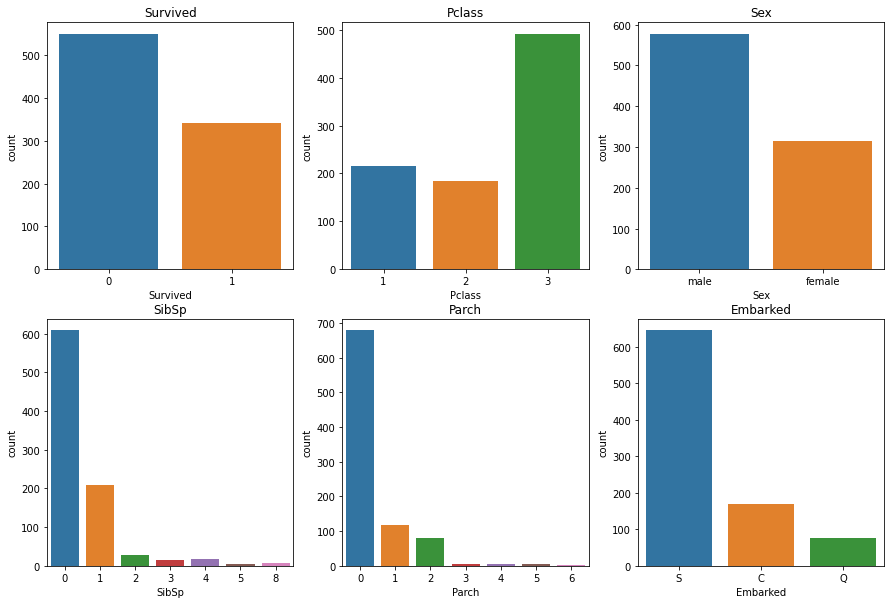

In [4]:
col = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
plt.figure(figsize=(15, 10))
for i in col:
    plt.subplot(2,3, col.index(i)+1)
    sns.countplot(data=train, x=i)
    plt.title(i)
plt.show()

## Hist Plot 

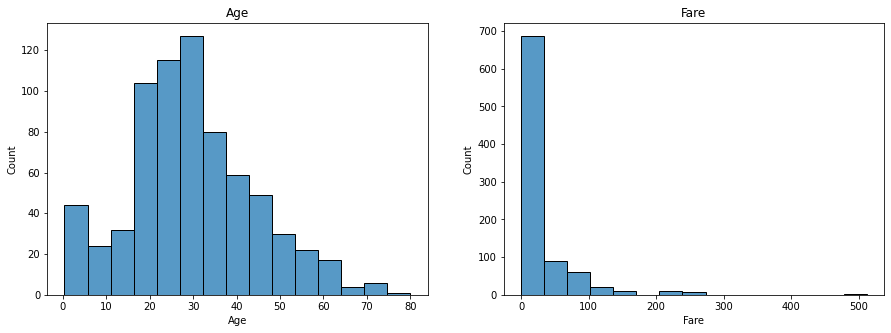

In [5]:
col = ['Age', 'Fare']
plt.figure(figsize=(15, 5))
for i in col:
    plt.subplot(1,2, col.index(i)+1)
    sns.histplot(data=train, x=i, bins=15)
    plt.title(i)
plt.show()

In [6]:
# col = ['Age', 'Fare']
# for i in col:
#     train[i+'_bin'] = pd.qcut(train[i], 10, duplicates='drop')

## Pairplot 

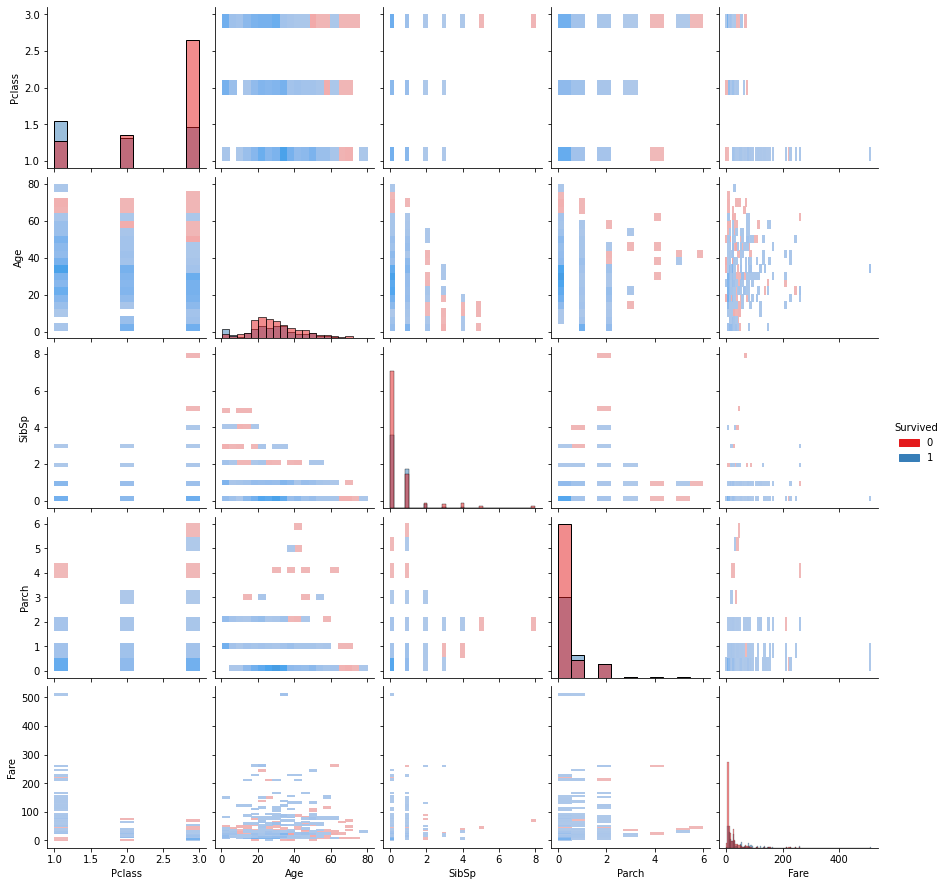

In [7]:
sns.pairplot(train.drop(columns=['PassengerId','Name','Ticket','Cabin']), palette='Set1', kind='hist',hue='Survived',)
plt.show()

## Ticket Type 

In [8]:
train.Ticket.head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [9]:
train['Ticket_type'] = train['Ticket'].apply(lambda x: x[0:3])
train['Ticket_type'] = train['Ticket_type'].astype('category')
train['Ticket_type'] = train['Ticket_type'].cat.codes

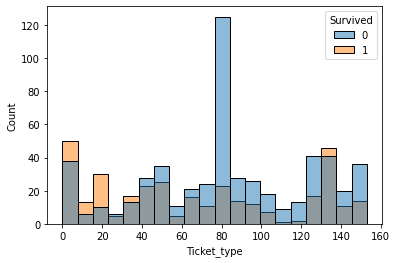

In [10]:
sns.histplot(data=train, x='Ticket_type',hue='Survived', bins=20)
plt.show()

## Title 

In [11]:
def search(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [12]:
train['Title_type'] = train.Name.apply(search)

<AxesSubplot:xlabel='Count', ylabel='Title_type'>

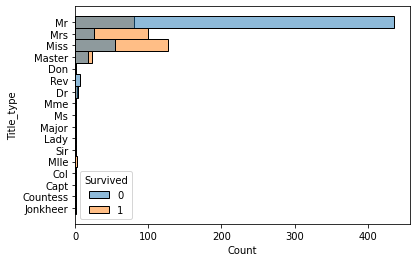

In [13]:
sns.histplot(data=train, y='Title_type', hue='Survived')

In [14]:
# rare=['Don','Rev','Major','Lady','Sir', 'Millie', 'Col', 'Capt','Countess','Johnkheer']
train['Title_type'] = train.Title_type.replace(dict(Mr=1, 
                                                    Mrs=2, 
                                                    Miss=3, Mme=3, Ms=3,
                                                    Master=4,
                                                    Don=5, Rev=5, Major=5, Lady=5, Sir=5, Millie=5, Col=5, Capt=5,
                                                    Countess=5, Jonkheer=5, Dr=5, Mlle=5))

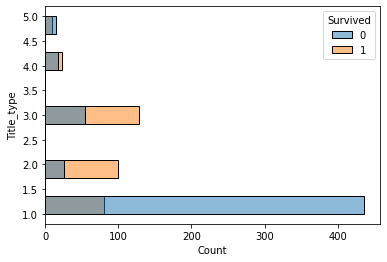

In [15]:
sns.histplot(data=train, y='Title_type', hue='Survived')
plt.show()

## Cabin

In [16]:
train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [17]:
train.Cabin.fillna(0)

0         0
1       C85
2         0
3      C123
4         0
       ... 
886       0
887     B42
888       0
889    C148
890       0
Name: Cabin, Length: 891, dtype: object

In [18]:
isinstance(train.Cabin[1], str)

True

In [19]:
train['HasCabin'] = train.Cabin.apply(lambda x : 1 if isinstance(x, str) else 0)

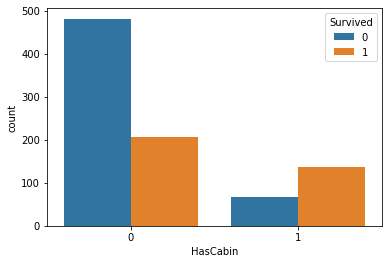

In [20]:
sns.countplot(data=train, x='HasCabin', hue='Survived')
plt.show()

## Missing Value

In [21]:
train.Age.isna().sum()

177

In [22]:
x = np.random.randint(0, high=train.Age.max(), size=train.Age.isna().sum())

In [23]:
train['Age'] = train.Age.apply(lambda x : np.random.randint(0, high=train.Age.max()) if np.isnan(x)==True else x)

In [24]:
train.isnull().sum()[train.isnull().sum()>0]

Cabin       687
Embarked      2
dtype: int64

In [25]:
train['Embarked'] = train.Embarked.apply(lambda x : train.Embarked.mode()[0] if isinstance(x, float) else x)

## Simplify 

In [26]:
train['Sex'] = train.Sex.replace(dict(male=0, female=1))

<AxesSubplot:xlabel='Embarked', ylabel='count'>

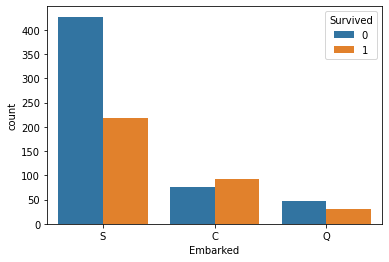

In [27]:
sns.countplot(data=train, x='Embarked', hue='Survived')

In [28]:
train['Embarked'] = train.Embarked.replace(dict(S=0, C=1, Q=2))

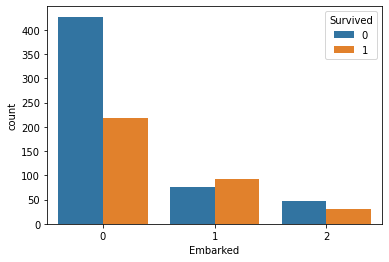

In [29]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.show()

## Binning Age and Fare

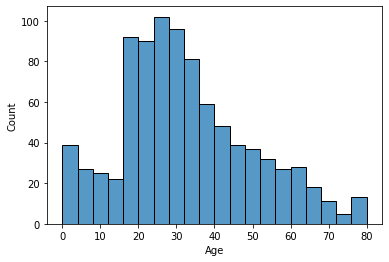

In [30]:
sns.histplot(data=train, x='Age', bins=20)
plt.show()

In [31]:
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 36), 'Age'] = 1
train.loc[(train['Age'] > 36) & (train['Age'] <= 52), 'Age'] = 2
train.loc[(train['Age'] > 52) & (train['Age'] <= 64), 'Age'] = 3
train.loc[train['Age'] >64, 'Age'] = 4

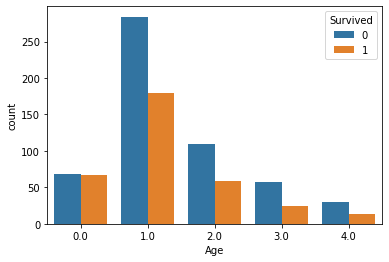

In [32]:
sns.countplot(data=train, x='Age', hue='Survived')
plt.show()

In [33]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

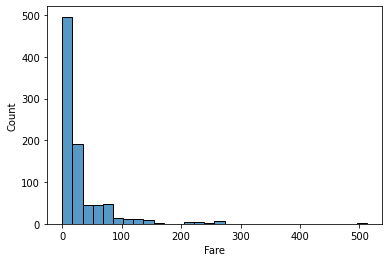

In [34]:
sns.histplot(data=train, x='Fare',bins=30)
plt.show()

In [35]:
train.loc[(train['Fare']<= 8), 'Fare'] = 0
train.loc[(train['Fare'] > 8) & (train['Fare'] <= 14.5), 'Fare'] = 1
train.loc[(train['Fare'] > 14.5) & (train['Fare'] <= 31), 'Fare'] = 2
train.loc[train['Fare'] >31, 'Fare'] = 3

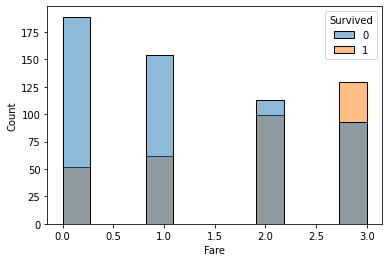

In [36]:
sns.histplot(data=train, x='Fare', hue='Survived')
plt.show()

## Creating new features 

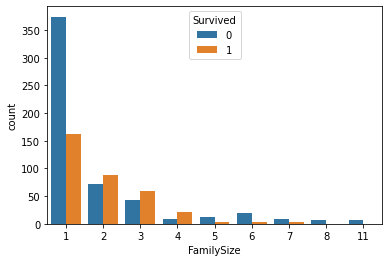

In [39]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.countplot(data=train, x='FamilySize', hue='Survived')
plt.show()

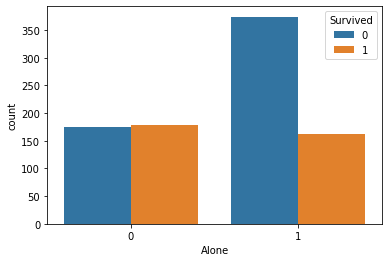

In [45]:
train['Alone'] = 0
train.loc[train['FamilySize'] ==1, 'Alone'] = 1
sns.countplot(data=train, x='Alone', hue='Survived')
plt.show()

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Title_type,HasCabin,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,124,1,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,C85,1,137,2,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,148,3,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,3.0,C123,0,3,2,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,1.0,NaN,0,97,1,0,1,1
